In [14]:
%load_ext autoreload
%autoreload 1
from useful_functions import *
from emceeHammer import *
import ast
from varname import nameof
savePNG = True ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotExtension = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExtension = str('.pgf')

notebookPlotFlag = True ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline
np.random.seed(1006)

tess_2020bpi = pd.read_csv('JhaData/TESS_SN2020bpi.csv')[::2].reset_index(drop=True)
tess_2020bpi_norm = normLC(tess_2020bpi)
#tess_2020bpi['mjd_0'] = tess_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
fluxNorm = 0.4*np.max(tess_2020bpi['flux'])

tess_2020bpi_s21_a_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_a_MCMC.csv')
tess_2020bpi_s21_a_mcmc_norm = normLC(tess_2020bpi_s21_a_mcmc)

##ZTF Data
ztf_2020bpi = pd.read_csv('JhaData/ztf_SN2020bpi.csv')
ztf_2020bpi['mjd_0'] = ztf_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
## Note: setting the zero value of mjd_0 to that of TESS for consitency 
ztf_2020bpi['e_flux_tuple'] = ztf_2020bpi['e_flux']
ztf_2020bpi['e_flux'] = [
    np.mean(ast.literal_eval(flux))
    for flux in ztf_2020bpi['e_flux'].to_numpy()]

compFluxRaw = pd.read_csv('CompanionEmission(Reformat).csv')
# display(compFlux)
# display(tess_2020bpi_norm)
tess_area = np.pi * 5.25**2
compFlux = pd.DataFrame()
compRads = ['f50','f25','f10','f5','f1','f0.5','f0.1']
compFlux['t-t0'] = compFluxRaw['time']
for rad in compRads:
    compFlux[rad] = compFluxRaw[rad]/tess_area
display(compFlux)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,t-t0,f50,f25,f10,f5,f1,f0.5,f0.1
0,0.001023,0.000079,0.000067,0.000053,0.000044,0.000029,0.000024,0.000016
1,0.022361,0.001886,0.001569,0.001226,0.001012,0.000644,0.000525,0.000319
2,0.043699,0.003702,0.003066,0.002376,0.001947,0.001212,0.000976,0.000569
3,0.065037,0.005498,0.004536,0.003496,0.002848,0.001741,0.001387,0.000781
4,0.086375,0.007272,0.005982,0.004586,0.003718,0.002238,0.001767,0.000966
...,...,...,...,...,...,...,...,...
763,16.281848,0.246026,0.132403,0.050057,0.020673,0.001532,0.000364,0.000005
764,16.303186,0.245975,0.132330,0.050001,0.020640,0.001527,0.000362,0.000005
765,16.324524,0.245924,0.132257,0.049946,0.020606,0.001523,0.000361,0.000005
766,16.345862,0.245873,0.132184,0.049890,0.020573,0.001518,0.000360,0.000005


<IPython.core.display.Javascript object>


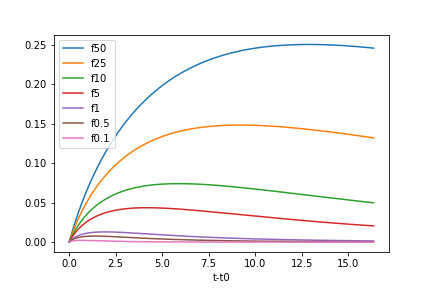

In [16]:
ax = compFlux.plot('t-t0','f50')
compFlux.plot('t-t0','f25',ax=ax)
compFlux.plot('t-t0','f10',ax=ax)
compFlux.plot('t-t0','f5',ax=ax)
compFlux.plot('t-t0','f1',ax=ax)
compFlux.plot('t-t0','f0.5',ax=ax)
compFlux.plot('t-t0','f0.1',ax=ax)

In [34]:
np.polyfit(compFlux['t-t0'],compFlux['f50'],1/2)

array([0.20411079])